In [2]:
X_DATA_PATH = '/content/drive/MyDrive/cuoiki/Cuoikichuan9huyetdao/data_9_huyet_dao.pickle'
Y_DATA_PATH = '/content/drive/MyDrive/cuoiki/Cuoikichuan9huyetdao/data_9_huyet_dao.csv'
#tao duong path chua du lieu

In [3]:
import pandas as pd
y_data = pd.read_csv(Y_DATA_PATH)
y_data.head(None)
#doc du lieu csv, toa do 9 huyet dao

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9
0,180,105,146,85,113,119,186,166,116,180,100,141,83,114,110,70,76,83
1,180,104,145,85,114,118,187,165,115,179,99,142,82,113,109,70,76,82
2,179,106,146,84,112,120,186,165,115,179,99,141,82,115,110,70,75,82
3,179,106,147,86,113,120,185,165,115,180,100,142,83,113,110,71,75,82
4,179,106,145,85,112,120,186,166,117,179,101,140,83,115,111,69,76,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,179,88,150,61,109,96,175,145,87,134,69,108,42,88,106,36,37,42
450,178,86,150,61,111,97,173,144,88,134,68,107,42,88,106,36,35,43
451,180,86,150,63,110,96,174,145,89,134,69,107,41,88,108,34,36,42
452,180,86,149,62,109,95,173,144,89,133,69,107,43,89,108,34,37,44


In [4]:
import glob
import pickle
import numpy as np
#du lieu hinh anh doc tu file pickle gom hinh anh dau nguoi
x_data = pickle.load(open(X_DATA_PATH, 'rb'))
x_data = np.array(x_data, dtype = 'float32')
x_data /= 255
print('Shape of x data: ', x_data.shape)
#doc du lieu hinh anh dau nguoi

Shape of x data:  (454, 250, 250, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


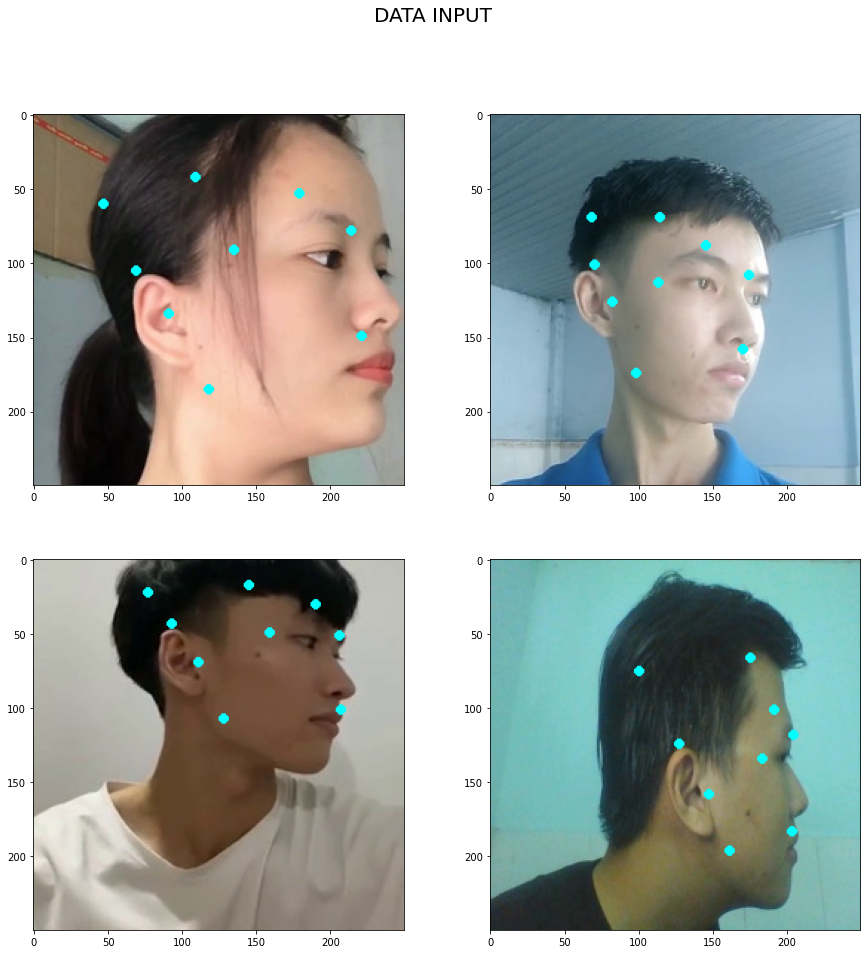

In [5]:
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2

#show hinh anh de test anh dau vao (data tu tao tu ban be trong trong 19146)
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .2)
for i in range(4):
    #bieu do 2 hang 2 cot
    plt.subplot(2, 2, i + 1)
    k = random.randint(0, 454) #chon ngau nhien
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (255, 255, 0), 2)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
_ = plt.suptitle('DATA INPUT', size = 20)


In [6]:
from sklearn.model_selection import train_test_split
import numpy as np
#TONG QUA CAC SO LIEU CUA DU LIEU TRONG BAI LAM
#x_data = x_data.reshape(-1, (250,250,3), 1)
input_shape = x_data.shape[1:4]
y_data = np.array(y_data, dtype = 'float32')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('KICH THUOC DAU VAO: ', input_shape)
print('SO LUONG OUTPUT DAU RA: ', num_class)
print('KICH THUOC DU LIEU X TRAIN: ', x_train.shape)
print('KICH THUOC DU LIEU y TRAIN: ', y_train.shape)
print('KICH THUOC DU LIEU X TEST: ', x_test.shape)
print('KICH THUOC DU LIEU Y TEST: ', y_test.shape)

KICH THUOC DAU VAO:  (250, 250, 3)
SO LUONG OUTPUT DAU RA:  18
KICH THUOC DU LIEU X TRAIN:  (408, 250, 250, 3)
KICH THUOC DU LIEU y TRAIN:  (408, 18)
KICH THUOC DU LIEU X TEST:  (46, 250, 250, 3)
KICH THUOC DU LIEU Y TEST:  (46, 18)


In [7]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D
#TAO MODEL VOI SEQUENTIAL
model = Sequential()
#----------------
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape = input_shape))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
#----------------
model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
#----------------
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
#----------------
model.add(Convolution2D(128, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
# Dense
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
# model.add(Dense(num_class, activation='softmax'))
model.add(Dense(num_class))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 250, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      18432     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 250, 250, 64)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 64)     256       
 hNormalization)                                        

In [8]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
model.compile(
    optimizer = 'Adam',
    loss = "mean_squared_error",
    metrics = ['mae']
)

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 500, batch_size = 4, validation_split = 0.01).history

Epoch 1/500
101/101 [==============================] - 22s 104ms/step - loss: 5697.4204 - mae: 51.0703 - val_loss: 9387.5674 - val_mae: 83.5293
Epoch 2/500
101/101 [==============================] - 10s 96ms/step - loss: 691.7228 - mae: 19.3824 - val_loss: 6201.3242 - val_mae: 66.0972
Epoch 3/500
101/101 [==============================] - 9s 91ms/step - loss: 360.7984 - mae: 13.1168 - val_loss: 4017.8523 - val_mae: 53.0974
Epoch 4/500
101/101 [==============================] - 9s 91ms/step - loss: 228.4665 - mae: 11.3862 - val_loss: 2934.1885 - val_mae: 45.6646
Epoch 5/500
101/101 [==============================] - 9s 91ms/step - loss: 155.3314 - mae: 9.4846 - val_loss: 2217.0183 - val_mae: 40.2531
Epoch 6/500
101/101 [==============================] - 9s 92ms/step - loss: 157.9998 - mae: 9.4825 - val_loss: 1854.8386 - val_mae: 37.7706
Epoch 7/500
101/101 [==============================] - 9s 92ms/step - loss: 119.2451 - mae: 8.3917 - val_loss: 1561.5793 - val_mae: 34.9813
Epoch 8/500


In [12]:
final_loss, final_accuracy = model.evaluate(x_test, y_test)
print('Final loss: {:.4f}'.format(final_loss))
print('Final accuracy: {:.4f}'.format(final_accuracy))
#Cang thap thi model predict cang dung. Loss la sai so tinh bang binh phuong sai so pixel

2/2 [==============================] - 0s 72ms/step - loss: 71.5949 - mae: 6.8941
Final loss: 71.5949
Final accuracy: 6.8941


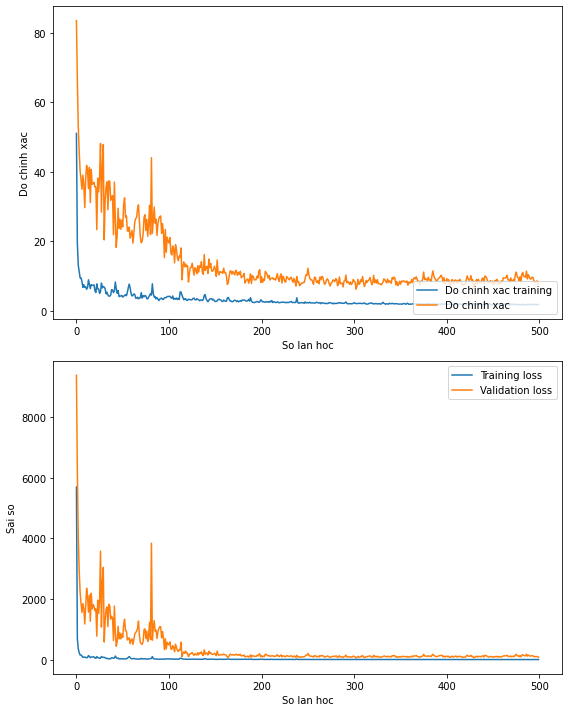

In [14]:
import pandas as pd
import matplotlib.pylab as plt
# Ve bieu do de kiem tra do chinh xac cua model
model_history = pd.DataFrame(hist)
# add epoch column
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'Do chinh xac training')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Do chinh xac')
ax1.legend(loc = 'lower right')
ax1.set_ylabel('Do chinh xac')
ax1.set_xlabel('So lan hoc')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'Training loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Sai so')
ax2.set_xlabel('So lan hoc')
plt.tight_layout()
plt.show()

In [15]:
# luu model de detect on video
PATH = '/content/drive/MyDrive/cuoiki/Cuoikichuan9huyetdao'
MODEL_NAME = "Model_MAE" + str(round(final_accuracy)) + ".h5"
model.save(PATH + MODEL_NAME)

In [18]:
print(PATH + MODEL_NAME)

/content/drive/MyDrive/cuoiki/Cuoikichuan9huyetdaoModel_MAE7.h5


In [16]:
#load model
from keras.models import load_model
model = load_model(PATH + MODEL_NAME)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


44
[188.0253    83.85873  154.8669    66.06327  114.60241  107.96039
 199.96758  153.33655  106.866516 174.8585    79.4443   134.78304
  57.860275 111.57673  122.15547   42.788128  43.98126   56.46842 ]


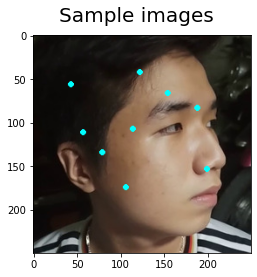

In [22]:
# kiem tra do chinh xac cua model
import matplotlib.pylab as plt
import cv2
pred = model.predict(x_test)
n = x_test.shape[0]
# plt.figure(figsize = (15, 15))
# plt.subplots_adjust(hspace = .2)
#plt.subplot(3, 2, i + 1)
k = random.randint(0, 46)
print(k)
img = x_test[k].reshape(250,250,3)
points = pred[k,:]
print(points)
for j in range(9):
  cv2.circle(img, (int(points[j*2]), int(points[j*2+1])), 2, (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
_ = plt.suptitle('Sample images', size = 20)

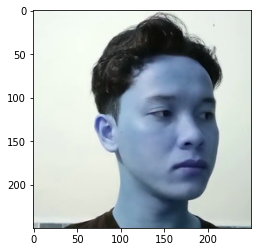

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


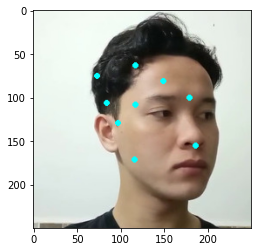

In [28]:
# kiem tra anh ngoai
import matplotlib.pylab as plt
import cv2
from tensorflow.keras.utils import load_img, img_to_array
import tensorflow as tf
path = '/content/3.jpg'

img_input_test = cv2.imread(path)
plt.imshow(img_input_test,cmap ='gray')
plt.show()
img = tf.keras.utils.img_to_array(img_input_test)
img = img.astype('float32')
img /= 255

pred = model.predict(img.reshape(1,250,250,3))
#print(pred.shape)
points_tt = pred[:]
points_tt = points_tt.reshape(-1)
for j in range(9):
  x = points_tt[2*j]
  x = x.astype('int')
  if x<0:
    x=x*(-1)
  y = points_tt[2*j+1]
  y = y.astype('int')
  if y<0:
    y=y*(-1)
  cv2.circle(img, (x,y) ,2, (255, 255, 0), 2)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
